<a href="https://colab.research.google.com/github/hjj31/ML/blob/master/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

np.random.seed(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv

train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

print('Train 1 Shape: ', train1.shape)
print('Train 2 Shape: ', train2.shape)
print('Train 3 Shape: ', train3.shape)

--2020-08-30 22:06:02--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  --.-KB/s    in 0.07s   

2020-08-30 22:06:03 (163 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-30 22:06:03--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]


In [4]:
train1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train1['index'] = train1['index'] + 1
train1.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [5]:
train2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train2.head()

,index,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [6]:
train3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train3.head()

,index,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   96498 non-null  int64  
 1   0       96498 non-null  float64
 2   1       96498 non-null  float64
 3   2       96498 non-null  float64
 4   3       96498 non-null  float64
 5   4       96498 non-null  float64
 6   5       96498 non-null  float64
 7   6       96498 non-null  float64
 8   7       96498 non-null  float64
 9   8       96498 non-null  float64
 10  9       96498 non-null  float64
 11  10      96498 non-null  float64
 12  11      96498 non-null  float64
 13  12      96498 non-null  float64
 14  13      96498 non-null  float64
 15  14      96498 non-null  float64
 16  15      96498 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 12.5 MB


In [8]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            96498 non-null  int64  
 1   txsize           96498 non-null  int64  
 2   txvirtualsize    96498 non-null  int64  
 3   txinputs_count   96498 non-null  int64  
 4   txoutputs_count  96498 non-null  int64  
 5   txinput_val      96498 non-null  float64
 6   txoutput_val     96498 non-null  float64
 7   txfee            96498 non-null  int64  
 8   Min_received     96498 non-null  float64
 9   Max_received     96498 non-null  float64
 10  Avg_received     96498 non-null  float64
 11  Total_received   96498 non-null  float64
 12  Stdev_received   96498 non-null  float64
 13  Var_received     96498 non-null  float64
 14  Min_sent         96498 non-null  float64
 15  Max_sent         96498 non-null  float64
 16  Avg_sent         96498 non-null  float64
 17  Total_sent  

In [9]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   96498 non-null  int64 
 1   label   96498 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
results = pd.merge(train3, train1, on='index', how='inner')

# split data into X and y
X = results.iloc[:,2:18]
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y1 = results['label']

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(results['label'].unique())
Y = pd.DataFrame(le.transform(Y1))

In [12]:
Y.nunique()

0    6
dtype: int64

In [13]:
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [14]:
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

In [15]:
models = [logistic, sgd]

In [16]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [17]:
for model in models:
    print(model)
    get_cv_scores(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV Mean:  0.8701391421964905
STD:  0.0018556704185396463


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV Mean:  0.8690769497547413
STD:  0.003296388045521389




In [18]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score:  0.8513951202576612
Best Params:  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


In [19]:
logistic = linear_model.LogisticRegression(C=0.0001, class_weight={1:0.5, 0:0.5}, penalty='l2', solver='liblinear')
get_cv_scores(logistic)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV Mean:  0.8376641827673045
STD:  0.0005077503885965179




In [20]:
from sklearn.metrics import accuracy_score

logistic.fit(X_train, y_train)

y_train_pred = logistic.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: %.2f%%" % (accuracy_train))


y_test_pred = logistic.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.84%
Accuracy: 0.84%


In [21]:
loss = ['hinge', 'log']
penalty = ['l1', 'l2']
alpha = [0.0001, 0.001]
learning_rate = ['constant', 'optimal']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
eta0 = [1, 10]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='accuracy', verbose=1, n_jobs=-1, n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 64 is smaller than n_iter=1000. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score:  0.8697505451002726
Best Params:  {'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'alpha': 0.0001}


In [22]:
sgd = linear_model.SGDClassifier(alpha=0.001,
                                 class_weight={1:0.4, 0:0.6},
                                 eta0=1,
                                 learning_rate='optimal',
                                 loss='hinge',
                                 penalty='l1')
get_cv_scores(sgd)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV Mean:  0.8648411229519745
STD:  0.0048737890691958035




In [23]:
sgd.fit(X_train, y_train)

y_train_pred = sgd.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: %.2f%%" % (accuracy_train))


y_test_pred = sgd.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.87%
Accuracy: 0.87%


In [24]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [25]:
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(57898, 16)
(19300, 16)
(19300, 16)
(57898, 6)
(19300, 6)
(19300, 6)


In [29]:
nn = models.Sequential()
nn.add(layers.Dense(500, activation = 'relu', input_shape = (16, )))
nn.add(layers.Dense(500))
nn.add(layers.LeakyReLU(alpha = 0.01))
nn.add(layers.Dense(500))
nn.add(layers.LeakyReLU(alpha = 0.01))
nn.add(layers.Dense(6, activation = 'softmax'))
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
           metrics = ['accuracy'])

In [30]:
history = nn.fit(x_train, y_train, epochs = 50, validation_data=(x_dev, y_dev), batch_size = 10000)
nn.evaluate(x_dev, y_dev)[1]

Epoch 1/50
6/6 [==============================] - 0s 41ms/step - loss: 1.2235 - accuracy: 0.6964 - val_loss: 0.6968 - val_accuracy: 0.8393
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 0.6410 - accuracy: 0.8389 - val_loss: 0.6397 - val_accuracy: 0.8394
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 0.6047 - accuracy: 0.8409 - val_loss: 0.6195 - val_accuracy: 0.8632
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6033 - accuracy: 0.8549 - val_loss: 0.5830 - val_accuracy: 0.8670
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.5771 - accuracy: 0.8634 - val_loss: 0.5630 - val_accuracy: 0.8689
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5617 - accuracy: 0.8689 - val_loss: 0.5515 - val_accuracy: 0.8699
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5586 - accuracy: 0.8686 - val_loss: 0.5462 - val_accuracy: 0.8702
Epoch 8/50
6/6 [===========

0.8708289861679077

In [31]:
nn.evaluate(x_test, y_test)

604/604 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.8686


[0.5336607694625854, 0.8686010241508484]

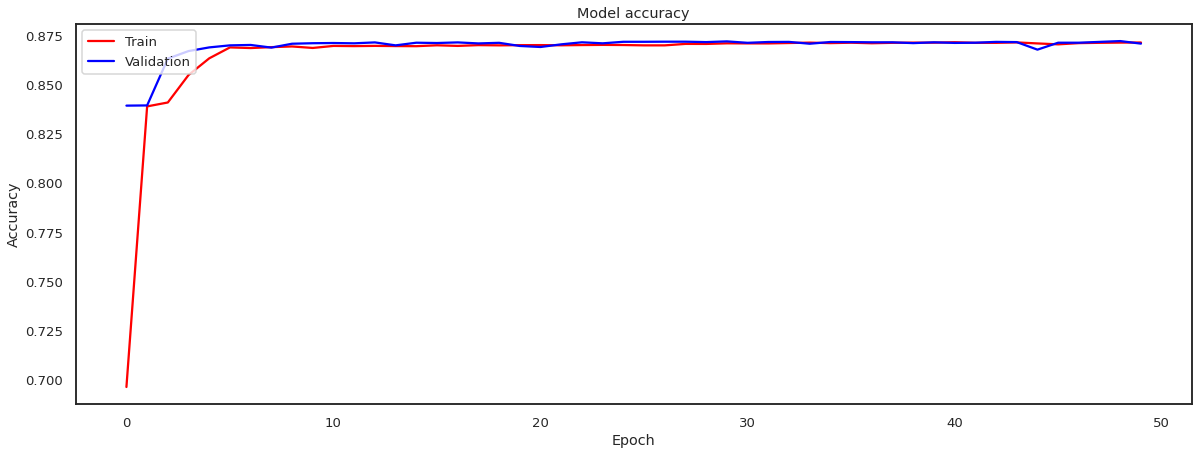

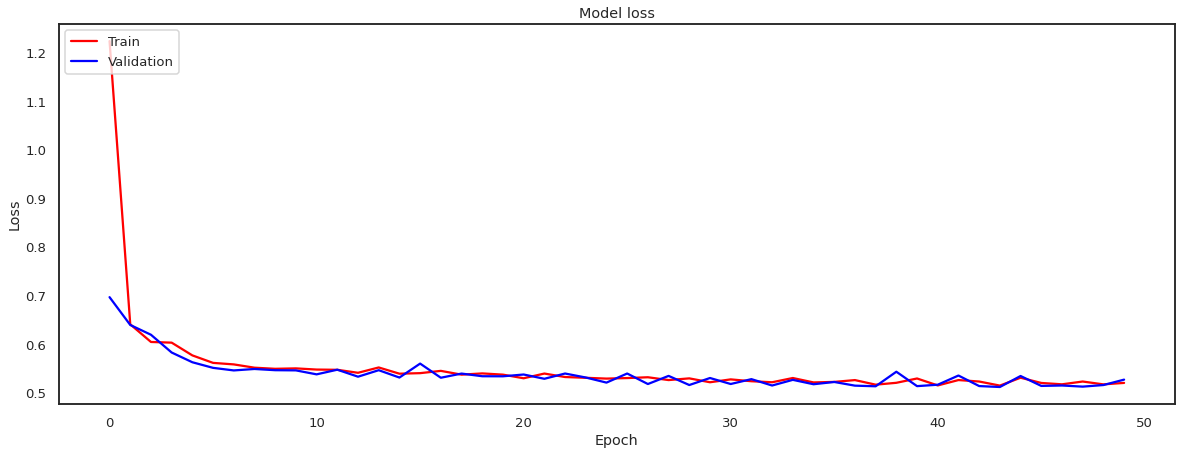

In [32]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()